#Vinicius de Barros Silva 10335913

In [ ]:
#cnn2.py - grad2020 - Testado em TF2 em Colab
import os; os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
import tensorflow.keras as keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ReduceLROnPlateau
import numpy as np; import sys
from matplotlib import pyplot as plt
from time import time; import sys
import cv2

In [ ]:
(AX, AY), (QX, QY) = fashion_mnist.load_data() # AX [60000,28,28] AY [60000,]
AX=255-AX; QX=255-QX

In [ ]:
nclasses = 10
AY2 = keras.utils.to_categorical(AY, nclasses) # 3 -> 0001000000
QY2 = keras.utils.to_categorical(QY, nclasses)

In [ ]:
nl, nc = AX.shape[1], AX.shape[2] #28, 28
AX = (AX.astype('float32') / 255.0)-0.5 # -0.5 a +0.5
QX = (QX.astype('float32') / 255.0)-0.5 # -0.5 a +0.5
#AX = np.expand_dims(AX,axis=3) # AX [60000,28,28,1]
#QX = np.expand_dims(QX,axis=3)


In [ ]:
model = Sequential() # 28x28
model.add(Conv2D(20, kernel_size=(5,5), activation='relu',
 input_shape=(nl, nc, 1) )) #20x24x24
model.add(MaxPooling2D(pool_size=(2,2))) #20x12x12
model.add(Conv2D(40, kernel_size=(5,5), activation='relu')) #40x8x8
model.add(MaxPooling2D(pool_size=(2,2))) #40x4x4
model.add(Flatten()) #640
model.add(Dense(200, activation='relu')) #200
model.add(Dense(nclasses, activation='softmax')) #10
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='cnn1.png', show_shapes=True);
#model.summary()
opt=optimizers.Adam()
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
t0=time()
model.fit(AX, AY2, batch_size=1000, epochs=40, verbose=2)
t1=time(); print("Tempo de treino: %.2f s"%(t1-t0))
score = model.evaluate(QX, QY2, verbose=False)

Epoch 1/40
60/60 - 26s - loss: 0.9913 - accuracy: 0.6746 - 26s/epoch - 431ms/step
Epoch 2/40
60/60 - 25s - loss: 0.5244 - accuracy: 0.8056 - 25s/epoch - 421ms/step
Epoch 3/40
60/60 - 25s - loss: 0.4464 - accuracy: 0.8380 - 25s/epoch - 410ms/step
Epoch 4/40
60/60 - 25s - loss: 0.3949 - accuracy: 0.8597 - 25s/epoch - 408ms/step
Epoch 5/40
60/60 - 25s - loss: 0.3701 - accuracy: 0.8674 - 25s/epoch - 410ms/step
Epoch 6/40
60/60 - 25s - loss: 0.3435 - accuracy: 0.8767 - 25s/epoch - 408ms/step
Epoch 7/40
60/60 - 25s - loss: 0.3320 - accuracy: 0.8807 - 25s/epoch - 409ms/step
Epoch 8/40
60/60 - 25s - loss: 0.3131 - accuracy: 0.8883 - 25s/epoch - 422ms/step
Epoch 9/40
60/60 - 25s - loss: 0.2993 - accuracy: 0.8933 - 25s/epoch - 409ms/step
Epoch 10/40
60/60 - 25s - loss: 0.2935 - accuracy: 0.8947 - 25s/epoch - 412ms/step
Epoch 11/40
60/60 - 25s - loss: 0.2813 - accuracy: 0.9002 - 25s/epoch - 411ms/step
Epoch 12/40
60/60 - 25s - loss: 0.2699 - accuracy: 0.9048 - 25s/epoch - 411ms/step
Epoch 13/40
6

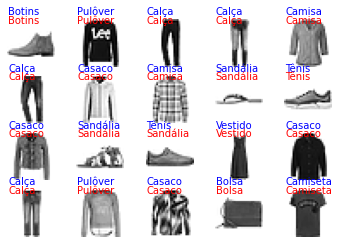

In [ ]:
from matplotlib import pyplot as plt
QP2=model.predict(QX); QP=np.argmax(QP2,1)
categorias=["Camiseta", "Calça", "Pulôver", "Vestido", "Casaco", "Sandália", "Camisa", "Tênis", "Bolsa", "Botins"]
f = plt.figure()
for i in range(20):
 f.add_subplot(4,5,i+1)
 plt.imshow( QX[i,:,:], cmap="gray", vmin=-0.5, vmax=+0.5)
 plt.axis("off");
 plt.text(0,-3,categorias[QY[i]],color="b")
 plt.text(0, 2,categorias[QP[i]],color="r")
plt.savefig("fashionweek.png")
plt.show()

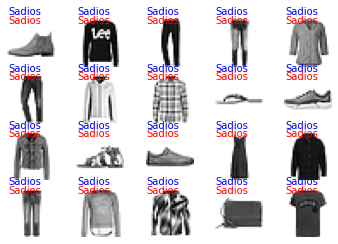

In [ ]:
from matplotlib import pyplot as plt
QP2=model.predict(QX); QP=np.argmax(QP2,1)
categorias=["Camiseta", "Calça", "Pulôver", "Vestido", "Casaco", "Sandália", "Camisa", "Tênis", "Bolsa", "Botins"]
categorias = ['Doentes' if categorias == 'Pulôve' else 'Sadios' for categorias in categorias]
f = plt.figure()
for i in range(20):
 f.add_subplot(4,5,i+1)
 plt.imshow( QX[i,:,:], cmap="gray", vmin=-0.5, vmax=+0.5)
 plt.axis("off");
 plt.text(0,-3,categorias[QY[i]],color="b")
 plt.text(0, 2,categorias[QP[i]],color="r")
plt.savefig("fashionsick.png")
plt.show()

In [ ]:
TP = 0 #True positive
FN = 0 #False negative 
TN = 0 #True negative
FP = 0 #False positive
for i in range(len(QP)):
  if(QP[i] == QY[i]) and (QP[i] == 2): #estar com a doença e apontar que esta doente
    TP += 1
  if(QY[i] == 2) and (QP[i] != 2):     #estar com a doença e apontar que não esta doente
    FN += 1
  if(QP[i] == QY[i]) and (QP[i] != 2): #estar sadio e apontar que esta sadio
    TN += 1
  if(QP[i] == 2) and (QY[i] != QP[i]): #estar sadio e apontar doente
    FP += 1
sensitivity = TP/(TP + FN)
specificity = TN/(TN + FP)

In [ ]:
print('Test loss: %.4f'%(score[0]))
print('Test accuracy: %.2f %%'%(100*score[1]))
print('Test error: %.2f %%'%(100*(1-score[1])))
print('Test sensitivity: %.2f %%'%(100*sensitivity))
print('Test specificity: %.2f %%'%(100*specificity))
t2=time()
QP2=model.predict(QX); QP=np.argmax(QP2,1)
t3=time(); print("Tempo de predicao: %.2f s"%(t3-t2))
nerro=np.count_nonzero(QP-QY); print("nerro=%d"%(nerro))
model.save('cnn1.h5')

Test loss: 0.2684
Test accuracy: 91.09 %
Test error: 8.91 %
Test sensitivity: 88.50 %
Test specificity: 98.15 %
Tempo de predicao: 1.88 s
nerro=891
